In [1]:
## Import Some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Deep Learning/#1 ANN/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### In Classification Case

In [4]:
## Divide the dataset into independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Feature Engineering

In [7]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(['Gender'],drop_first=True)

In [10]:
gender

""
0


In [11]:
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [14]:
X = pd.concat([X,geography,gender],axis=1)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1


In [16]:
# Splitting the dataset into train set split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.10643166,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.74866447,
         1.75486502, -0.57369368],
       [-1.19119591, -0.94312892, -1.031415  , ...,  1.48533467,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  1.41231994,
        -0.5698444 , -0.57369368],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.84432121,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.32472465,
         1.75486502, -0.57369368]])

In [19]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.61085707,
         1.75486502, -0.57369368],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.49587037,
        -0.5698444 , -0.57369368],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.42478674,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.71888467,
        -0.5698444 ,  1.74309049],
       [-0.00566991, -0.46460796, -0.33936434, ..., -1.54507805,
         1.75486502, -0.57369368],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.61255917,
         1.75486502, -0.57369368]])

In [20]:
X_train.shape

(8000, 10)

In [21]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [22]:
### Lets initialize the ANN
classifier=Sequential()

In [23]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(9,input_shape=(10,),activation='relu'))

In [24]:
classifier

In [28]:
# adding the first hidden layer
classifier.add(Dense(units=9,activation='relu'))

In [29]:
##adding the second hidden layer
classifier.add(Dense(units=9,activation='relu'))

In [30]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [31]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 99        
                                                                 
 dense_1 (Dense)             (None, 10)                100       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
 dense_3 (Dense)             (None, 9)                 90        
                                                                 
 dense_4 (Dense)             (None, 9)                 90        
                                                                 
 dense_5 (Dense)             (None, 9)                 90        
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [33]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [34]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5

)

In [36]:
X_train.shape

(8000, 10)

In [37]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 5s 3ms/step - loss: 0.4265 - accuracy: 0.8105 - val_loss: 0.3868 - val_accuracy: 0.8225
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3826 - accuracy: 0.8400 - val_loss: 0.3584 - val_accuracy: 0.8585
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3714 - accuracy: 0.8518 - val_loss: 0.3669 - val_accuracy: 0.8535
Epoch 4/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3643 - accuracy: 0.8545 - val_loss: 0.3497 - val_accuracy: 0.8635
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3602 - accuracy: 0.8553 - val_loss: 0.3557 - val_accuracy: 0.8535
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3584 - accuracy: 0.8537 - val_loss: 0.3437 - val_accuracy: 0.8575
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3551 - accuracy: 0.8604 - val_loss: 0.3442 - val_accuracy: 0.8640

In [38]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

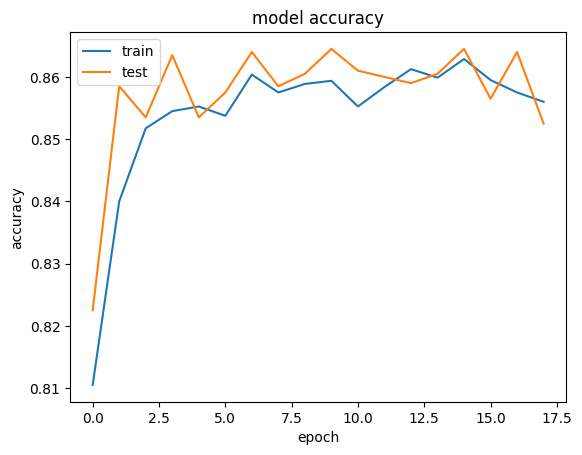

In [39]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

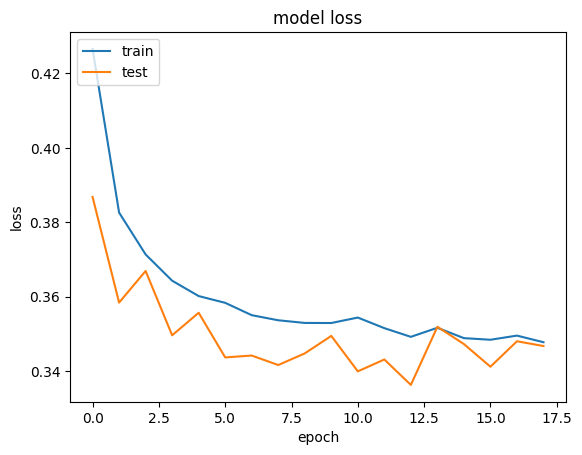

In [40]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Making the predictions and evaluating the model

In [41]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [42]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1549,   46],
       [ 249,  156]])

In [43]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [44]:
score

0.8525

In [45]:
##get the weights
classifier.get_weights()

[array([[ 1.33447861e-02, -3.34807187e-01, -1.47466376e-01,
         -2.35009387e-01,  2.38362879e-01, -1.05067350e-01,
          8.93856287e-01,  4.15189527e-02,  1.05466418e-01],
        [-1.16583097e+00, -1.10027730e-01,  1.95222747e+00,
         -2.26823354e+00, -4.78970736e-01,  2.23147050e-01,
         -2.72092193e-01, -2.05598807e+00,  2.49146366e+00],
        [ 3.63715619e-01, -1.31513149e-01, -5.07952631e-01,
         -1.31945640e-01,  4.51613992e-01, -1.44218564e-01,
         -9.97677565e-01, -7.76076540e-02, -4.79643978e-03],
        [-1.35521758e+00, -2.12285089e+00, -9.49478567e-01,
         -1.28886223e-01, -2.54259515e+00,  4.87731010e-01,
          8.19755256e-01, -7.34036326e-01, -9.23703849e-01],
        [-4.64748919e-01, -3.00251484e+00, -2.29946828e+00,
          1.57678694e-01, -1.97331131e-01,  2.92793846e+00,
         -2.69905090e-01,  4.65750903e-01,  1.21716484e-01],
        [ 5.60156465e-01,  4.43231612e-02, -4.89496021e-03,
          4.84555095e-01, -8.154724

In [46]:
## Saving h5 file
classifier.save('/content/drive/MyDrive/Deep Learning/#1 ANN/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('/content/drive/MyDrive/Deep Learning/#1 ANN/model.h5')

In [49]:
classifier1.predict(X_test)

63/63 [==============================] - 0s 3ms/step


array([[0.23112662],
       [0.2890747 ],
       [0.09993981],
       ...,
       [0.4567304 ],
       [0.16144097],
       [0.2162247 ]], dtype=float32)

In [50]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#### In Regression Case

In [52]:
## Divide the dataset into independent and dependent features

X=dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited']]
y=dataset.iloc[:,12]

In [53]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [54]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [55]:
## Ferature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X=pd.concat([X,geography,gender],axis=1)
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Lets initialize the ANN
regressor=Sequential()
## Adding the input Layer and first hidden layer
regressor.add(Dense(10,input_shape=(11,),activation='relu'))


# adding the first hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.2))

##adding the second hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.3))

##  Adding the output layer
regressor.add(Dense(1))

In [56]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                120       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
import tensorflow
mse=tensorflow.keras.losses.MeanSquaredError(
    name='mean_squared_error'
)
metrics=tensorflow.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)

In [66]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [67]:
regressor.compile(optimizer=opt,loss=mse,metrics=['mae'])

In [68]:
## Early Stopping
import tensorflow
early_stopping=tensorflow.keras.callbacks.EarlyStopping(
    monitor="mae",
    patience=20

)

In [69]:
model_history=regressor.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 3s 2ms/step - loss: 5393122304.0000 - mae: 60340.6328 - val_loss: 3388759808.0000 - val_mae: 49883.9570
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 3371107328.0000 - mae: 49973.5703 - val_loss: 3368371712.0000 - val_mae: 49820.8086
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 3353831168.0000 - mae: 49895.5625 - val_loss: 3356094720.0000 - val_mae: 49801.9883
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 3343283712.0000 - mae: 49807.6289 - val_loss: 3348581376.0000 - val_mae: 49660.0312
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 3331796992.0000 - mae: 49775.6016 - val_loss: 3348739840.0000 - val_mae: 49626.2695
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 3328718080.0000 - mae: 49734.2578 - val_loss: 3335021056.0000 - val_mae: 49634.2305
Epoch 7/100
800/800 [=========================

In [70]:
y_test

9394    192852.67
898     128702.10
2398     75732.25
5906     89368.59
2343    135662.17
          ...    
1037    180969.55
2899     70760.69
9549    141533.19
2740     11276.48
6690    192950.60
Name: EstimatedSalary, Length: 2000, dtype: float64

In [71]:
y_pred = regressor.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [72]:
y_pred

array([[106182.27 ],
       [102824.42 ],
       [101106.98 ],
       ...,
       [ 92846.18 ],
       [103109.266],
       [106294.48 ]], dtype=float32)

In [73]:
from sklearn.metrics import r2_score

In [74]:
print(r2_score(y_test,y_pred))

-0.009888571500279442


In [75]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,-0.506242,-0.569844,1.743090,-1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.506242,1.754865,-0.573694,0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,-0.506242,-0.569844,-0.573694,-1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,-0.506242,-0.569844,1.743090,0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687
...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,-0.506242,1.754865,-0.573694,-1.091687
7996,1.478815,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687
7997,0.901515,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,-0.506242,-0.569844,-0.573694,0.916013
7998,-0.624205,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687
